In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
!ls "/content/drive/My Drive/Colab Notebooks/Product Sentiment Classification/Dataset"

'Sample Submission.csv'   Test.csv   Train.csv


### Import Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Set file paths for train and predict datasets

In [4]:
train_dataset = "/content/drive/My Drive/Colab Notebooks/Product Sentiment Classification/Dataset/Train.csv"
predict_dataset = "/content/drive/My Drive/Colab Notebooks/Product Sentiment Classification/Dataset/Test.csv"

### Get train dataset info

In [26]:
train_df = pd.read_csv(train_dataset)
train_df.head()

,Text_ID,Product_Description,Product_Type,Sentiment
0,3057,The Web DesignerÛªs Guide to iOS (and Android...,9,2
1,6254,RT @mention Line for iPad 2 is longer today th...,9,2
2,8212,Crazy that Apple is opening a temporary store ...,9,2
3,4422,The lesson from Google One Pass: In this digit...,9,2
4,5526,RT @mention At the panel: &quot;Your mom has a...,9,2


In [27]:
train_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Text_ID              6364 non-null   int64 
 1   Product_Description  6364 non-null   object
 2   Product_Type         6364 non-null   int64 
 3   Sentiment            6364 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 199.0+ KB


### Get predict dataset info

In [7]:
predict_df = pd.read_csv(predict_dataset)
predict_df.head()

,Text_ID,Product_Description,Product_Type
0,5786,RT @mention Going to #SXSW? The new iPhone gui...,7
1,5363,RT @mention 95% of iPhone and Droid apps have ...,9
2,6716,RT @mention Thank you to @mention for letting ...,9
3,4339,#Thanks @mention we're lovin' the @mention app...,7
4,66,At #sxsw? @mention / @mention wanna buy you a ...,9


In [8]:
predict_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2728 entries, 0 to 2727
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Text_ID              2728 non-null   int64 
 1   Product_Description  2728 non-null   object
 2   Product_Type         2728 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 64.1+ KB


### Data Preprocessing

#### A) Removing Twitter Handles (@)

In [28]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    
    return input_txt   

In [29]:
train_df['Product_Description_Clean'] = np.vectorize(remove_pattern)(train_df['Product_Description'], "@[\w]*")

#### B) Removing Punctuations, Numbers, and Special Characters

In [30]:
train_df['Product_Description_Clean'] = train_df['Product_Description_Clean'].str.replace("[^a-zA-Z#]", " ")

#### C) Removing Short Words

In [31]:
train_df['Product_Description_Clean'] = train_df['Product_Description_Clean'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

#### D) Tokenization

In [32]:
tokenized_desc = train_df['Product_Description_Clean'].apply(lambda x: x.split())

#### E) Stemming

In [33]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [34]:
tokenized_desc = tokenized_desc.apply(lambda x: [stemmer.stem(i) for i in x])

In [35]:
for i in range(len(tokenized_desc)):
    tokenized_desc[i] = ' '.join(tokenized_desc[i])

train_df['Product_Description_Clean'] = tokenized_desc

In [36]:
train_df.head()

,Text_ID,Product_Description,Product_Type,Sentiment,Product_Description_Clean
0,3057,The Web DesignerÛªs Guide to iOS (and Android...,9,2,design guid android app today link #sxsw
1,6254,RT @mention Line for iPad 2 is longer today th...,9,2,line ipad longer today than yesterday #sxsw ge...
2,8212,Crazy that Apple is opening a temporary store ...,9,2,crazi that appl open temporari store austin to...
3,4422,The lesson from Google One Pass: In this digit...,9,2,lesson from googl pass thi digit environ user ...
4,5526,RT @mention At the panel: &quot;Your mom has a...,9,2,panel quot your ipad design boomer quot #sxsw


### Exploratory Data Analysis

#### A) Understanding the common words used in product description: WordCloud

In [37]:
from wordcloud import WordCloud

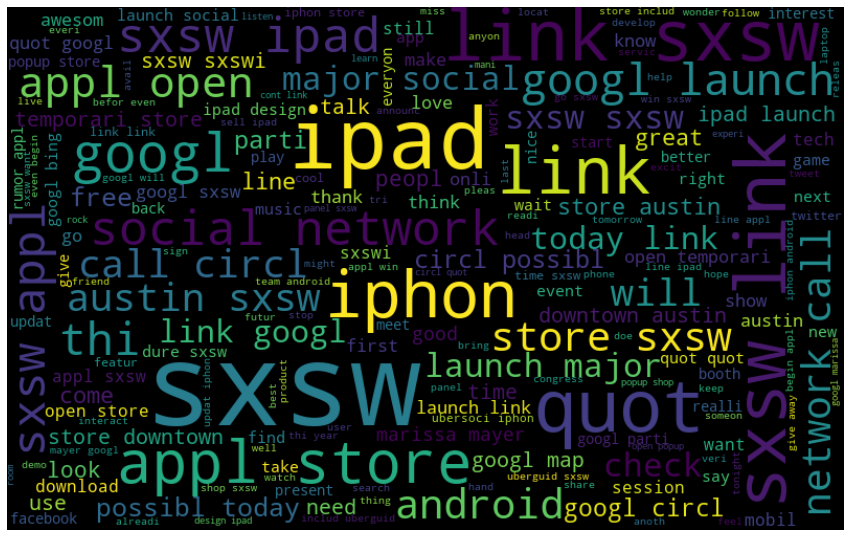

In [38]:
all_words = ' '.join([text for text in train_df['Product_Description_Clean']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### B) Words in "Positive" sentiments

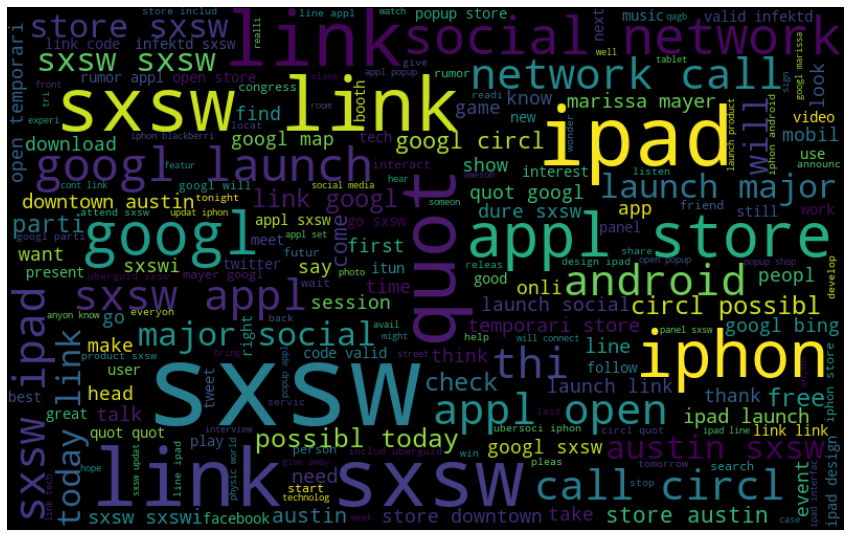

In [40]:
positive_words =' '.join([text for text in train_df['Product_Description_Clean'][train_df['Sentiment'] == 2]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### C) Words in "Negative" sentiments

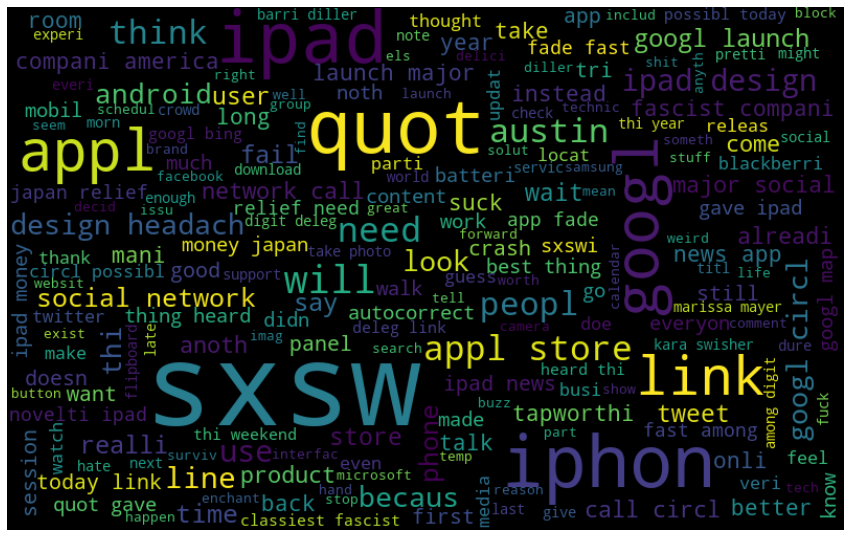

In [41]:
negative_words =' '.join([text for text in train_df['Product_Description_Clean'][train_df['Sentiment'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### D) Words in "Cannot Say" sentiments

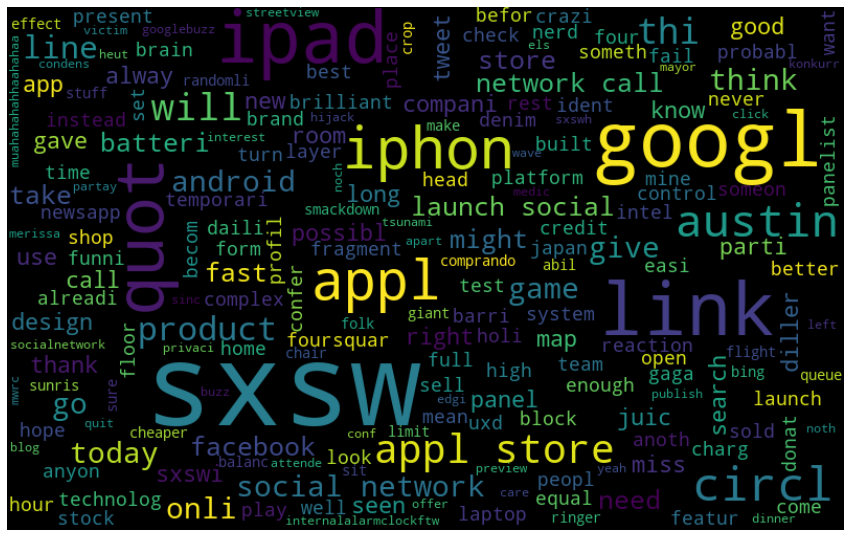

In [42]:
negative_words =' '.join([text for text in train_df['Product_Description_Clean'][train_df['Sentiment'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### E) Words in "No" sentiments

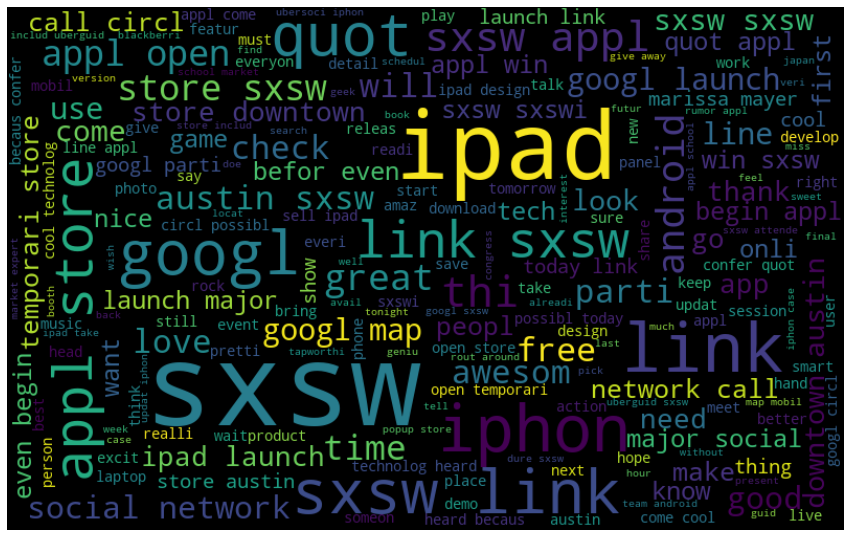

In [43]:
negative_words =' '.join([text for text in train_df['Product_Description_Clean'][train_df['Sentiment'] == 3]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### F) Understanding the impact of Hashtags

In [44]:
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [45]:
# extracting hashtags from "Cannot Say" sentiments
cant_say = hashtag_extract(train_df['Product_Description_Clean'][train_df['Sentiment'] == 0])

# extracting hashtags from "Negative" sentiments
negative = hashtag_extract(train_df['Product_Description_Clean'][train_df['Sentiment'] == 1])

# extracting hashtags from "Positive" sentiments
positive = hashtag_extract(train_df['Product_Description_Clean'][train_df['Sentiment'] == 2])

# extracting hashtags from "No" sentiments
no_sentm = hashtag_extract(train_df['Product_Description_Clean'][train_df['Sentiment'] == 3])

In [46]:
cant_say = sum(cant_say,[])
negative = sum(negative,[])
positive = sum(positive,[])
no_sentm = sum(no_sentm,[])

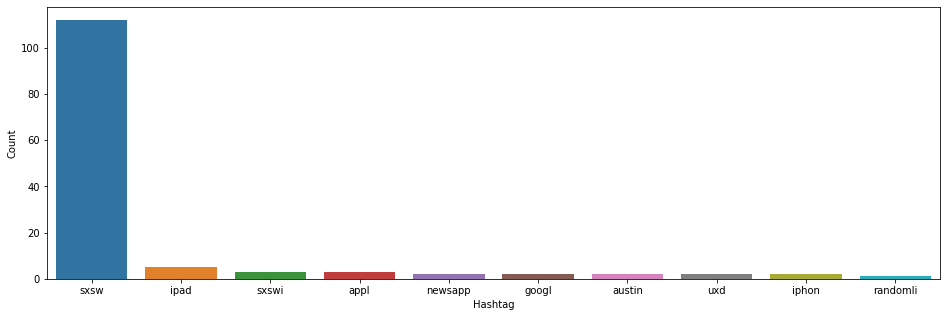

In [47]:
a = nltk.FreqDist(cant_say)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

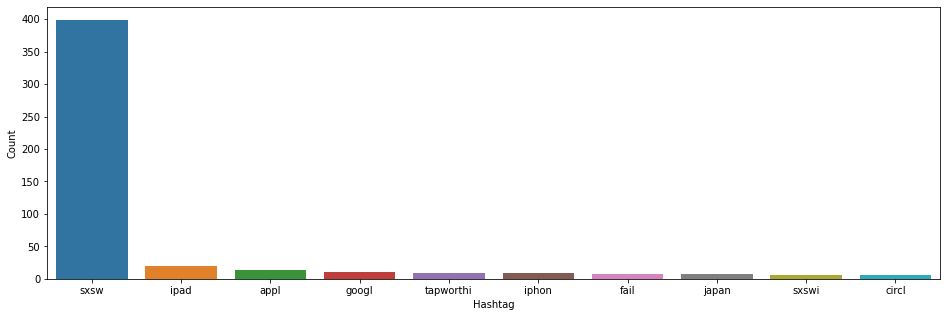

In [48]:
a = nltk.FreqDist(negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

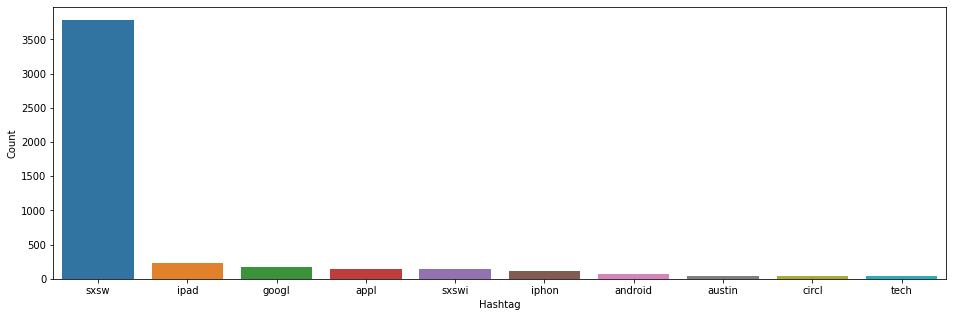

In [49]:
a = nltk.FreqDist(positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

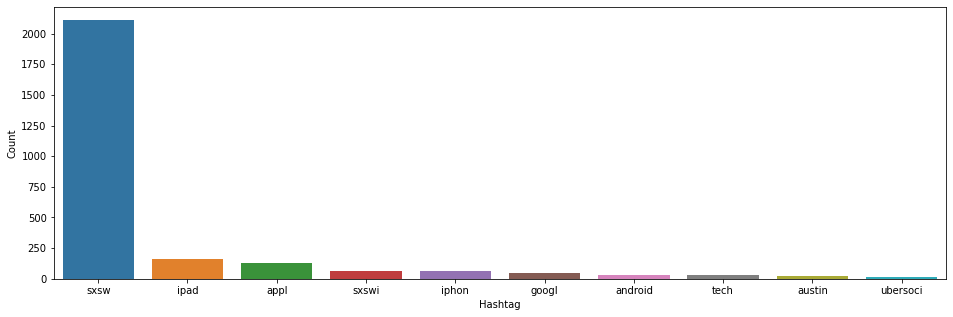

In [50]:
a = nltk.FreqDist(no_sentm)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

#### G) Examine Class Imbalance

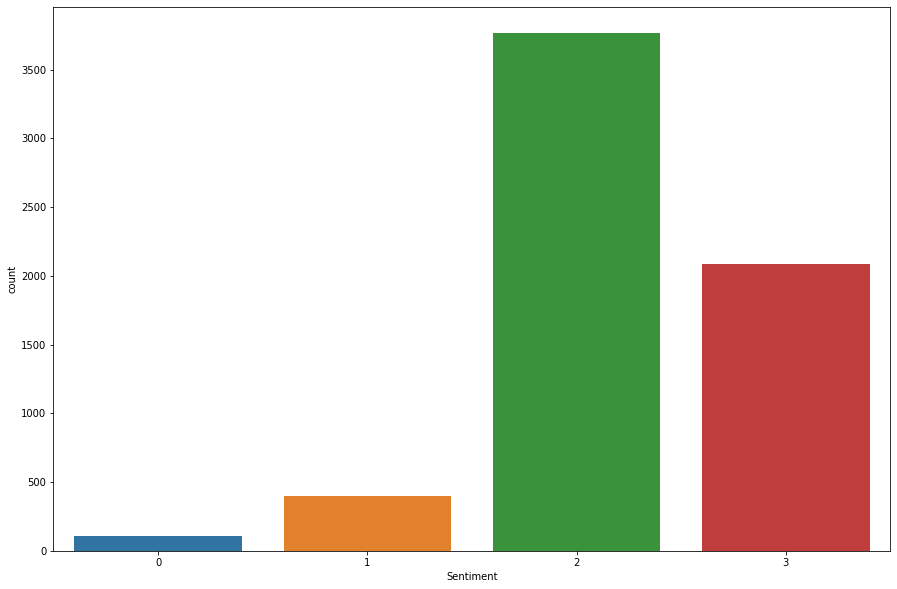

In [52]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Sentiment", data=train_df)